In [1]:
# imports

## allow interaction with the plots
%matplotlib widget

%load_ext autoreload
%autoreload 2

# add the main directory reference and import 'imports.py'
import sys
import os

if ".." not in sys.path:
    sys.path.insert(0, "..")
from tnibs.user import *

logger = logging.getLogger()
logger.setLevel(level=logging.WARN)

__builtins__.verbosity = 4
# Set the HF_HOME environment variable
os.environ["HF_HOME"] = "/run/media/HUNK/DATASETS/HF"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [2]:
# Declare a few global data/train params
from data.pgnSeq import *

from lib.train import SeqTrainer


class params:
    num_workers = 24
    # batch_size = 160
    batch_size = 100
    seq_len = 140
    files_per_epoch = 800

    max_epochs = 200
    # lr = 0.005
    lr = 0.005

    save_model_every = 80
    epoch_every = 400


dt = PGNData(
    PGNDataConfig.create(params, directory="resources/synthetic", files_per_epoch=100)
)

elite_dt = PGNData(
    PGNDataConfig.create(
        params, directory="resources/lichess_elite", files_per_epoch=100
    )
)

chess_dt = PGNData(
    PGNDataConfig.create(params, directory="resources/chess", files_per_epoch=100)
)

# dt.preview()

number of parameters: 41.80M
GPT(
  (transformer): ModuleDict(
    (wte): Embedding(7753, 512)
    (wpe): Embedding(140, 512)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm()
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=512, out_features=1536, bias=True)
          (c_proj): Linear(in_features=512, out_features=512, bias=True)
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
        )
        (ln_2): LayerNorm()
        (mlp): MLP(
          (c_fc): Linear(in_features=512, out_features=2048, bias=True)
          (gelu): GELU(approximate='none')
          (c_proj): Linear(in_features=2048, out_features=512, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm()
  )
  (lm_head): Linear(in_features=512, out_features=7753, bias=False)
)
GPT__seq_len=140__vocab_size=7753__n_lay

/home/archrichard/gh/torch_nib/tnibs/train/train.py:658: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(files[-1])


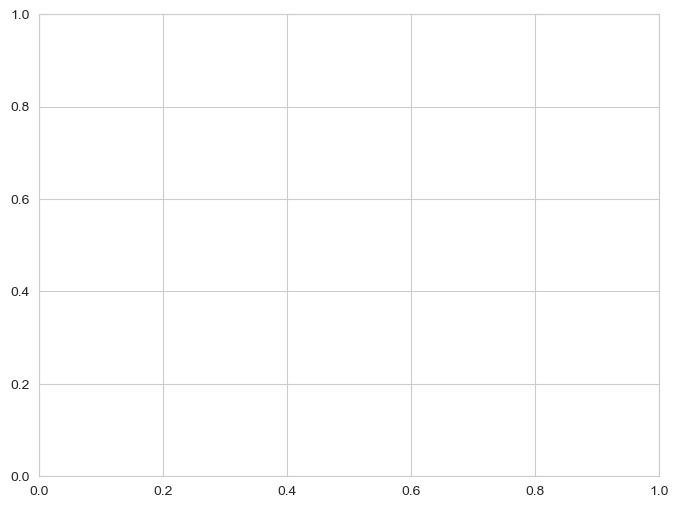

Epochs progress:   0%|          | 0/50 [00:00<?, ?Epoch/s]

/ARCHIVE/Personal/2186474940/.pixi/envs/dev/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  self.pid = os.fork()
/ARCHIVE/Personal/2186474940/.pixi/envs/dev/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and 

KeyboardInterrupt: 

In [3]:
# train nanogpt
from models.nanoGPT import *


model = GPT(
    GPTConfig(
        vocab_size=dt.classes,
        bias=True,
        seq_len=params.seq_len,
    )
)

print(model)
trainer = SeqTrainer(
    TrainerConfig.create(
        params,
        true_epoch_end_callback=dt.shuffle_files,
        load_previous="relaxed",
    )
)

trainer.fit(model, dt.loaders())


In [9]:
trainer.save_model()

./out GPT__seq_len=140__vocab_size=7753__n_layer=12__n_head=8__n_embd=512__dropout=0.0__bias=True__lr=0.005__weight_decay=0.01__epoch=1-200.pth


number of parameters: 41.85M
RWKV(
  (transformer): ModuleDict(
    (wte): Embedding(7753, 512)
    (wpe): Embedding(140, 512)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm()
        (tmix): RWKV_TimeMix_x051a(
          (time_shift): ZeroPad2d((0, 0, 1, -1))
          (receptance): Linear(in_features=512, out_features=512, bias=True)
          (key): Linear(in_features=512, out_features=512, bias=True)
          (value): Linear(in_features=512, out_features=512, bias=True)
          (gate): Linear(in_features=512, out_features=512, bias=True)
          (output): Linear(in_features=512, out_features=512, bias=True)
          (ln_x): GroupNorm(8, 512, eps=0.00064, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (ln_2): LayerNorm()
        (cmix): RWKV_ChannelMix_x051a(
          (time_shift): ZeroPad2d((0, 0, 1, -1))
          (key): Linear(in_features=512, out_features=1536, bias=True

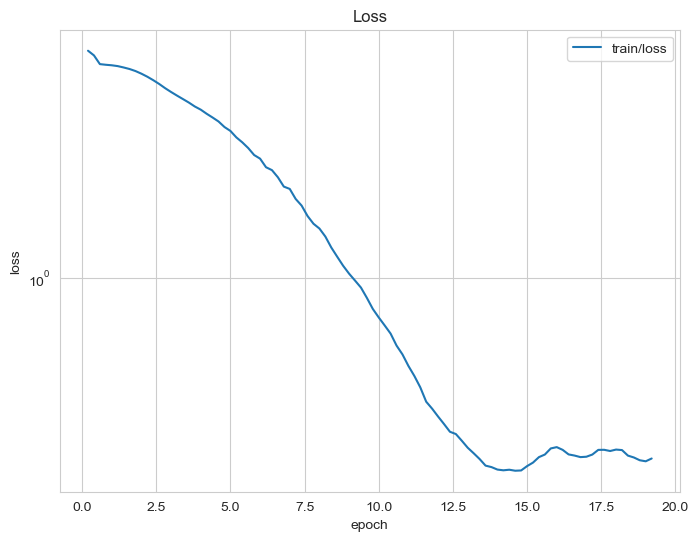

Epochs progress:   0%|          | 0/200 [00:00<?, ?Epoch/s]

/ARCHIVE/Personal/2186474940/.pixi/envs/dev/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  self.pid = os.fork()
/ARCHIVE/Personal/2186474940/.pixi/envs/dev/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and 

./out RWKV__seq_len=140__vocab_size=7753__n_layer=12__n_head=8__n_embd=512__dropout=0.0__bias=True__lr=0.005__weight_decay=0.01__epoch=1-64.pth


KeyboardInterrupt: 

In [3]:
# train rwkv

from models.nanoRWKV import *


model = RWKV(
    GPTConfig(
        vocab_size=dt.classes,
        bias=True,
        seq_len=params.seq_len,
    )
)
# model = RWKV(RWKVConfig(vocab_size=dt.classes, bias=True, seq_len=params.seq_len))

print(model)
trainer = SeqTrainer(
    TrainerConfig.create(
        params,
        epoch_end_callback=dt.shuffle_files,
        load_previous=True,
    )
)

trainer.fit(model, dt.loaders())


In [4]:
trainer.save_model()

./out RWKV__seq_len=140__vocab_size=7753__n_layer=12__n_head=8__n_embd=512__dropout=0.0__bias=True__lr=0.005__weight_decay=0.01__epoch=1-81.pth
